In [1]:
# Basic characterization of basic diet

In [21]:
#load required functions

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
from matplotlib.ticker import PercentFormatter
import scipy

import json
import os

capsize=6
#set colorscheme
colorav='k'
colorrefdiet='purple'
colorlistferm=['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e']

labelenergybac="energy supply via bacteria (kcal)"
labelenergybacfrac="enery supply via bacteria (%)"
labelenergybacfracnounit="energy supply via bacteria"
results_for_figure2={}

#dict to save major characteristics of British reference diet
#load file if already exists, otherwise start with empty dict
try:
    with open('data_analysisresults/BRD_characteristics.json', 'r') as fp:
        BRD = json.load(fp)
except:
    BRD={}
display(BRD)
import FPcalc #basic calculations of 


{'energy': 2275.0,
 'carbohydrates': 276.75,
 'sugars': 59.0,
 'proteins': 72.05000000000001,
 'fat': 105.5,
 'fiber': 19.9,
 'fiber_low': 14.599999999999998,
 'fiber_high': 25.2,
 'carbLI_standard': 35.670500000000004,
 'carbLI_higher': 44.6025,
 'carbLI_lower': 25.755000000000003,
 'carbLI_error': 9.423749999999998,
 'bacwetweight': 117.72413793103448,
 'fecalwetmass': 117.72413793103448,
 'fecaldrymass': 29.58620689655172,
 'fecaldrymassstd': 6.845624030794191,
 'fecealfractionbac': 0.546888888888889,
 'bacterialdrymass_feces': 16.180367816091955,
 'energybacteria_fromfeces': 101.11785577697411,
 'FP_fromfeces': 471.0230005849163,
 'FP_fromfeces_g': [10.904335695602317,
  2.153651111637971,
  5.520037668578593,
  6.865692286187041,
  2.47897326682256,
  4.179730053279632],
 'FP_fromfeces_gsum': 32.10242008210811,
 'energyfrac_fromfeces': 0.04444740913273587,
 'energybacteria_fromfeces_error': 23.39653832171075,
 'energyfrac_fromfeces_error': 0.010284192668883845,
 'FP_fromfeces_erro

,Quarter,energy,protein,fat,carbohydrate,sugar,fiber,fiber_std
0,JanMarch,2260,72.0,106,273,59,19.9,5.3
1,AprilJune,2210,70.9,102,269,59,19.9,5.3
2,JulySept,2330,73.7,107,285,59,19.9,5.3
3,OctDec,2300,71.6,107,280,59,19.9,5.3


estimated carb reaching LI for british diet
35.670500000000004


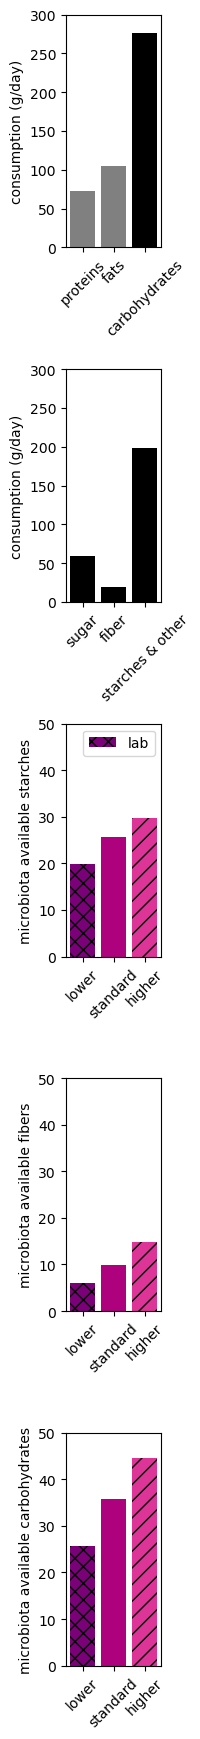

In [17]:
BDbasics=pd.read_csv('data/britishrefdiet.csv',skiprows=1)
#this is from 1976
#Houshold food consumption and expenditure Anual report of....
display(BDbasics)
BRD["energy"]=BDbasics['energy'].mean()
BRD["carbohydrates"]=BDbasics['carbohydrate'].mean()
BRD["sugars"]=BDbasics['sugar'].mean()
BRD["proteins"]=BDbasics['protein'].mean()
BRD["fat"]=BDbasics['fat'].mean()
BRD["fiber"]=BDbasics['fiber'].mean()
BRD["fiber_low"]=BRD["fiber"]-BDbasics['fiber_std'].mean()
BRD["fiber_high"]=BRD["fiber"]+BDbasics['fiber_std'].mean()

#plot overall compsoition
fig, axs = plt.subplots(5,1, figsize=(2,5*3.5))
axs[0].bar([1,2,3],[BRD["proteins"],BRD["fat"],BRD["carbohydrates"]],color=['gray','gray','k'])
axs[0].set_ylabel('consumption (g/day)')
axs[0].set_xticks([1,2,3])
axs[0].set_xticklabels(["proteins","fats","carbohydrates"],rotation=45)
axs[0].set_ylim(0,300)

#plot different carbohydrates
axs[1].bar([1,2,3],[BRD["sugars"],BRD["fiber"],BRD["carbohydrates"]-BRD["sugars"]-BRD["fiber"]],color=['k']*3)
axs[1].set_ylabel('consumption (g/day)')
axs[1].set_xticks([1,2,3])
axs[1].set_xticklabels(["sugar","fiber","starches & other"],rotation=45)
axs[1].set_ylim(0,300)

#given this composition of the diet, estimate how much is reaching the LI
BRD["carbLI_standard"]=FPcalc.estimate_carbsforbacteria(BRD["carbohydrates"],BRD["fiber"],BRD["sugars"],fiberdigestion=0.5,starchpassage=0.13)
BRD["carbLI_higher"]=FPcalc.estimate_carbsforbacteria(BRD["carbohydrates"],BRD["fiber"],BRD["sugars"],fiberdigestion=0.75,starchpassage=0.15)
BRD["carbLI_lower"]=FPcalc.estimate_carbsforbacteria(BRD["carbohydrates"],BRD["fiber"],BRD["sugars"],fiberdigestion=0.3,starchpassage=0.1)


#BRD["carbLI_lowfiber"]=FPcalc.estimate_carbsforbacteria(BRD["carbohydrates"],BRD["fiber_low"],BRD["sugars"],fiberdigestion=0.75,starchpassage=0.1)
#BRD["carbLI_highfiber"]=FPcalc.estimate_carbsforbacteria(BRD["carbohydrates"],BRD["fiber_high"],BRD["sugars"],fiberdigestion=0.75,starchpassage=0.2)
BRD["carbLI_error"]=(BRD["carbLI_higher"]-BRD["carbLI_lower"])/2.

other=BRD["carbohydrates"]-BRD["sugars"]-BRD["fiber"]
print("estimated carb reaching LI for british diet")
print(BRD["carbLI_standard"])

colorl=['#dd3497','#ae017e','#7a0177'][::-1]
#['#fff7f3','#fde0dd','#fcc5c0','#fa9fb5','#f768a1',
axs[2].bar([1,2,3],[0.1*other,0.13*other,0.15*other],color=colorl,hatch=["xx","","//"],label="lab")
#    databox,labels=["bacteria"],vert=True,showfliers=True, widths=[0.7]*1,patch_artist=True,)#,"Mice (autoclaved lab coy)"])
axs[2].set_ylabel('microbiota available starches')
axs[2].set_xticks([1,2,3])
axs[2].set_xticklabels(["lower","standard","higher"],rotation=45)
axs[2].set_ylim(0,50)
axs[2].legend()

alphal=[1,0.7,0.4]

axs[3].bar([1,2,3],[0.3*BRD["fiber"],0.5*BRD["fiber"],0.75*BRD["fiber"]],color=colorl,hatch=["xx","","//"])
axs[3].set_ylabel('microbiota available fibers')
axs[3].set_xticks([1,2,3])
axs[3].set_xticklabels(["lower","standard","higher"],rotation=45)
axs[3].set_ylim(0,50)

axs[4].bar([1,2,3],[0.3*BRD["fiber"]+0.1*other,0.5*BRD["fiber"]+0.13*other,0.15*other+0.75*BRD["fiber"]],color=colorl,hatch=["xx","","//"])
axs[4].set_ylabel('microbiota available carbohydrates')
axs[4].set_xticks([1,2,3])
axs[4].set_xticklabels(["lower","standard","higher"],rotation=45)
axs[4].set_ylim(0,50)

fig.tight_layout()
fig.savefig("plot_output_figure2/BRITISH_composition_carb.pdf")

with open('data_analysisresults/BRD_characteristics.json', 'w') as fp:
    json.dump(BRD, fp)

In [18]:
# plot estimation fermentation product amount for different estimations
# might need to ru

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


estimated carb reaching LI for british diet
35.670500000000004


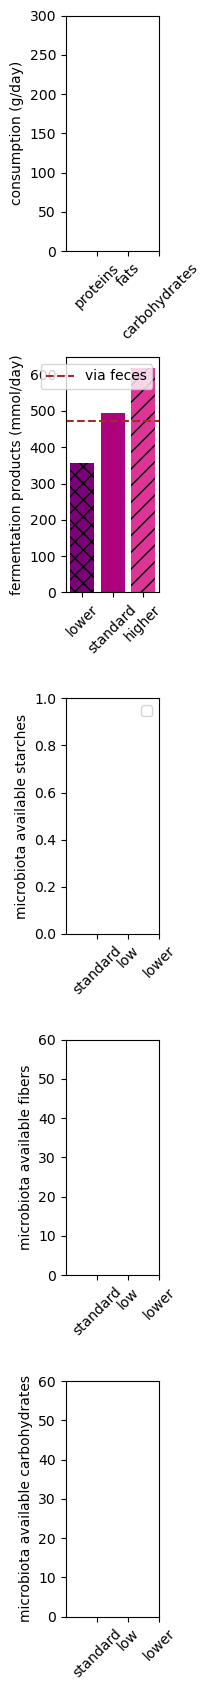

In [19]:

#plot overall compsoition
fig, axs = plt.subplots(5,1, figsize=(2.2,5*3.4))
#axs[0].bar([1,2,3],[BRD["proteins"],BRD["fat"],BRD["carbohydrates"]],color=['gray','gray','k'])
axs[0].set_ylabel('consumption (g/day)')
axs[0].set_xticks([1,2,3])
axs[0].set_xticklabels(["proteins","fats","carbohydrates"],rotation=45)
axs[0].set_ylim(0,300)

#plot different carbohydrates
axs[1].bar([1,2,3],[BRD["FP_fromcarbs_lower"],BRD["FP_fromcarbs_standard"],BRD["FP_fromcarbs_higher"]],hatch=["xx","","//"],color=colorl)
axs[1].set_ylabel('fermentation products (mmol/day)')
axs[1].set_xticks([1,2,3])
axs[1].set_xticklabels(["lower","standard","higher"],rotation=45)
#axs[1].set_ylim(0,300)
axs[1].axhline(BRD["FP_fromfeces"],ls='--',color='brown',label='via feces')
axs[1].legend()

other=BRD["carbohydrates"]-BRD["sugars"]-BRD["fiber"]
print("estimated carb reaching LI for british diet")
print(BRD["carbLI_standard"])

colorl=['#dd3497','#ae017e','#7a0177']
#['#fff7f3','#fde0dd','#fcc5c0','#fa9fb5','#f768a1',
#axs[2].bar([1,2,3],[0.15*other,0.13*other,0.1*other],color=colorl,hatch=["","xx","//"],label="lab")
#    databox,labels=["bacteria"],vert=True,showfliers=True, widths=[0.7]*1,patch_artist=True,)#,"Mice (autoclaved lab coy)"])
axs[2].set_ylabel('microbiota available starches')
axs[2].set_xticks([1,2,3])
axs[2].set_xticklabels(["standard","low","lower"],rotation=45)
#axs[2].set_ylim(0,60)
axs[2].legend()

#axs[3].bar([1,2,3],[0.75*BRD["fiber"],0.5*BRD["fiber"],0.3*BRD["fiber"]],color=colorl,hatch=["","xx","//"])
axs[3].set_ylabel('microbiota available fibers')
axs[3].set_xticks([1,2,3])
axs[3].set_xticklabels(["standard","low","lower"],rotation=45)
axs[3].set_ylim(0,60)

#axs[4].bar([1,2,3],[0.15*other+0.75*BRD["fiber"],0.5*BRD["fiber"]+0.13*other,0.3*BRD["fiber"]+0.1*other],color=colorl,hatch=["","xx","//"])
axs[4].set_ylabel('microbiota available carbohydrates')
axs[4].set_xticks([1,2,3])
axs[4].set_xticklabels(["standard","low","lower"],rotation=45)
axs[4].set_ylim(0,60)

fig.tight_layout()
fig.savefig("plot_output_figure2/BRITISH_composition_carb_FP.pdf")

